# Credit Card Users Churn Prediction
## Context
The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

## Objective
Customers’ leaving credit card services would lead the bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and the reason for same – so that the bank could improve upon those areas.
You as a Data Scientist at Thera Bank need to explore the data provided, identify patterns, and come up with a classification model to identify customers likely to churn, and provide actionable insights and recommendations that will help the bank improve its services so that customers do not renounce their credit cards.

## Data Description
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: The gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in the 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in the 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


## Exploratory Data Analysis

### Import Library

In [201]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [202]:
#Read the dataset
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Shape of Dataframe

In [203]:
df.shape

(10127, 21)

* There are 10127 rows with 21 columns

### Info of Dataframe

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 6 categorical columns and remaining are all numerical columns
* CLIENTNUM can be dropped as that doesnot help in identifying any patterns

In [205]:
df = df.drop(['CLIENTNUM'], axis = 1)

In [206]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [207]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


* Age Range:
The age of customers in your dataset ranges from 26 to 73 years. The majority of customers fall between 41 and 52 years old, with the median age being 46. This indicates a relatively mature customer base.

* Credit Limit:
Credit limits vary widely from as low as `$1,438.30` to as high as `$34,516.00`. The median credit limit is `$4,549.00`, with the upper quartile at `$11,067.50`. This shows a substantial range in customers' available credit, suggesting that the dataset includes both lower and higher credit limits.

* Monthly Activity:
Customers' total transaction amounts vary from `$510` to `$18,484`, with a median of `$3,899`. The upper quartile is `$4,741`, indicating that a significant portion of customers has relatively high transaction activity. This suggests that spending behavior can vary significantly among customers.

* Revolving Balance:
The total revolving balance, which ranges from `$0` to `$2,517`, has a median of `$1,276`. Most customers have revolving balances that are on the lower end, with the 75th percentile at `$1,784`. This may reflect either conservative spending or effective credit management by many customers.

* Utilization Ratio:
The average utilization ratio, which measures the proportion of available credit being used, ranges from 0.00 to 0.999. The median utilization ratio is 0.176, while the 75th percentile is 0.503. This indicates that while some customers use a significant portion of their available credit, many maintain relatively low utilization rates, which can be indicative of good credit management practices.


In [208]:
df.describe(include = 'O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10127,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


* The above are the top,unique and frequent values for categorical columns

### Duplicate values

In [209]:
#check if there are duplicates values
df.duplicated().sum()

0

* There are no duplicates

### Univariate Analysis

### Target Variable distribution

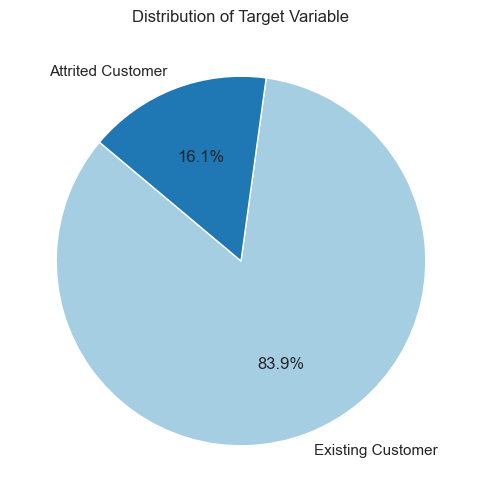

In [210]:
target_counts = df['Attrition_Flag'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Optional: set figure size
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(target_counts))))
plt.title('Distribution of Target Variable')
plt.show()

In [211]:
print('Total number of customers:', df['Attrition_Flag'].count())
print(df['Attrition_Flag'].value_counts())

Total number of customers: 10127
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


### Categorical variables distribution

#### Gender

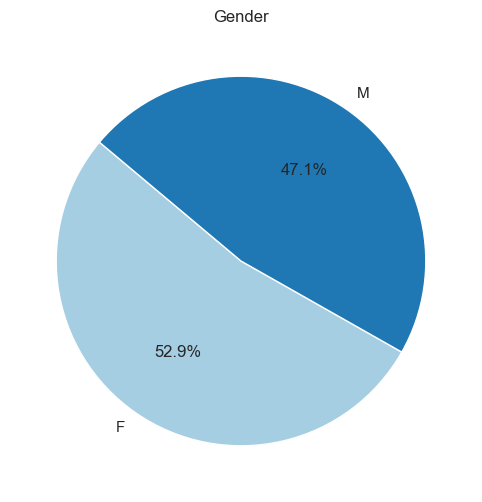

In [212]:
target_counts = df['Gender'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Optional: set figure size
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(target_counts))))
plt.title('Gender')
plt.show()

In [213]:
print('Total count:', df['Gender'].count())
print(df['Gender'].value_counts())

Total count: 10127
Gender
F    5358
M    4769
Name: count, dtype: int64


* There are more females than males in the dataset

#### Education level

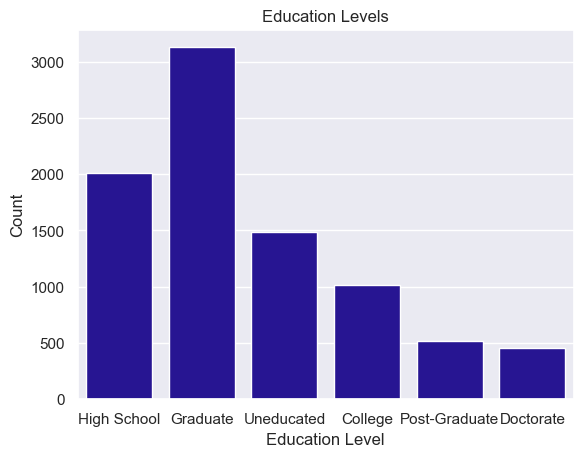

In [214]:
# Create a count plot
sns.countplot(x='Education_Level', data=df)

# Customize the plot
plt.title('Education Levels')
plt.ylabel('Count')
plt.xlabel('Education Level')

# Show the plot
plt.show()

* There are more Graduates in the dataset

#### Marital Status

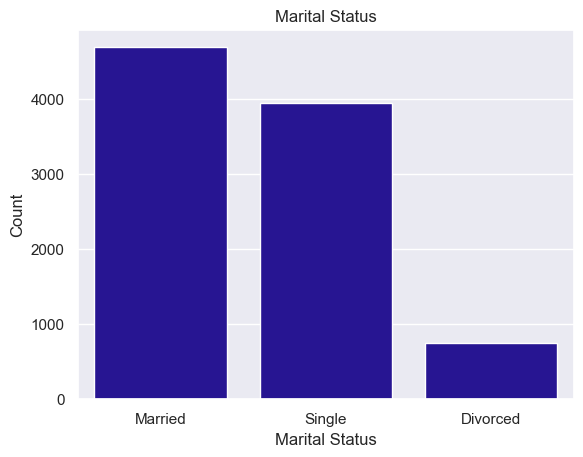

In [215]:
# Create a count plot
sns.countplot(x='Marital_Status', data=df)

# Customize the plot
plt.title('Marital Status')
plt.ylabel('Count')
plt.xlabel('Marital Status')

# Show the plot
plt.show()

* There are more Married Status in the dataset

#### Income Category

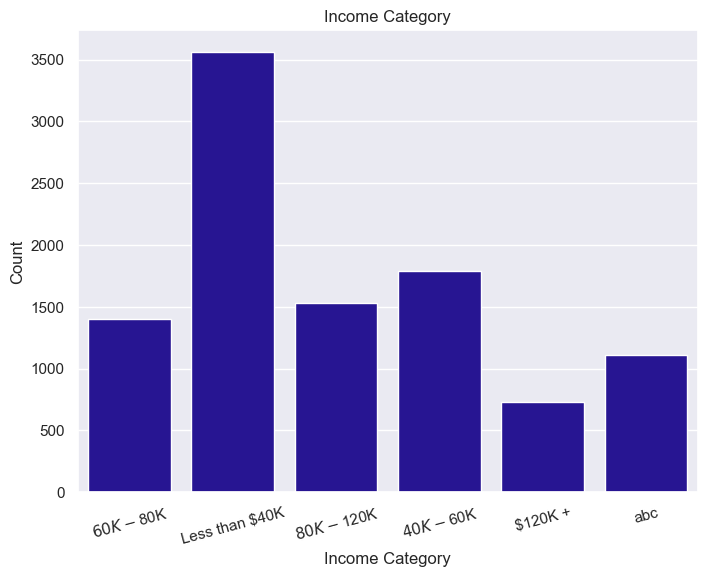

In [216]:

# Customize the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Income_Category', data=df)
plt.title('Income Category')
plt.ylabel('Count')
plt.xlabel('Income Category')
# Rotate the x-axis labels to prevent overlap
plt.xticks(rotation=15)

# Show the plot
plt.show()

* Most of the customers are in 'less than $40K' income category

#### Card Category

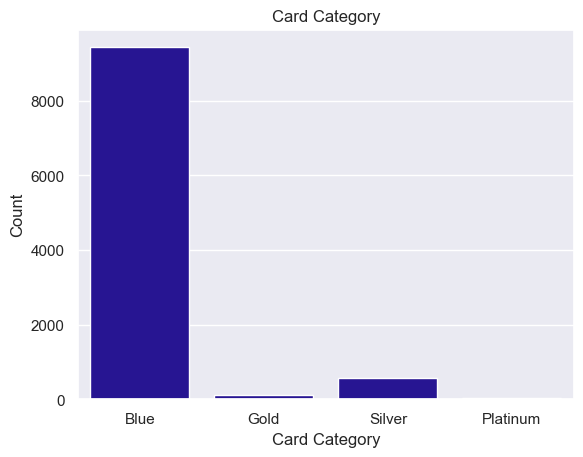

In [217]:
# Create a count plot
sns.countplot(x='Card_Category', data=df)

# Customize the plot
plt.title('Card Category')
plt.ylabel('Count')
plt.xlabel('Card Category')

# Show the plot
plt.show()

* There are more 'Blue' categorised customers in the dataset

### BiVariate Analysis

### Numerical variables by Target

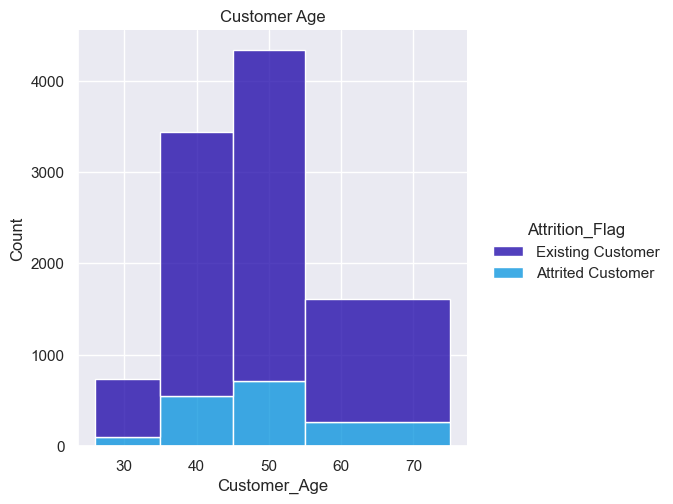

In [218]:
# Customer Age
sns.displot( data=df,  x='Customer_Age',  hue='Attrition_Flag', bins=[26, 35, 45, 55, 75], multiple='stack')
plt.title('Customer Age')
plt.show()

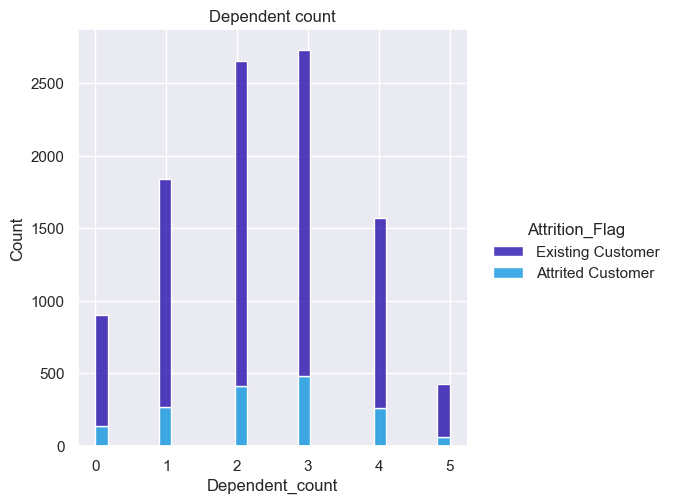

In [219]:
# Dependent_count
sns.displot( data=df,  x='Dependent_count',  hue='Attrition_Flag', multiple='stack')
plt.title('Dependent count')
plt.show()

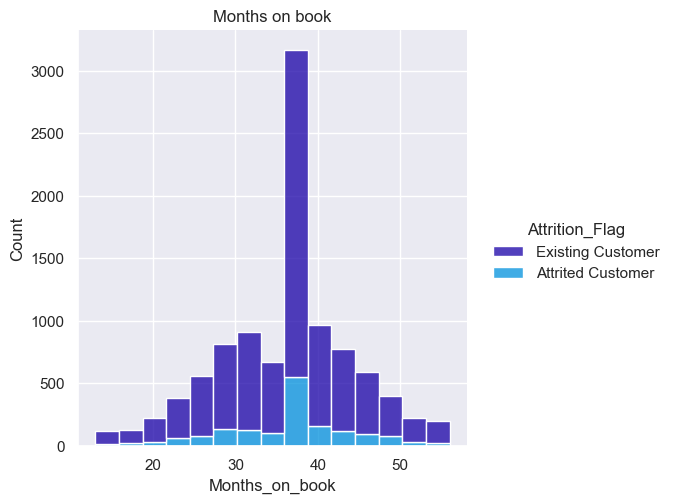

In [220]:
# Months_on_book
sns.displot( data=df,  x='Months_on_book',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Months on book')
plt.show()

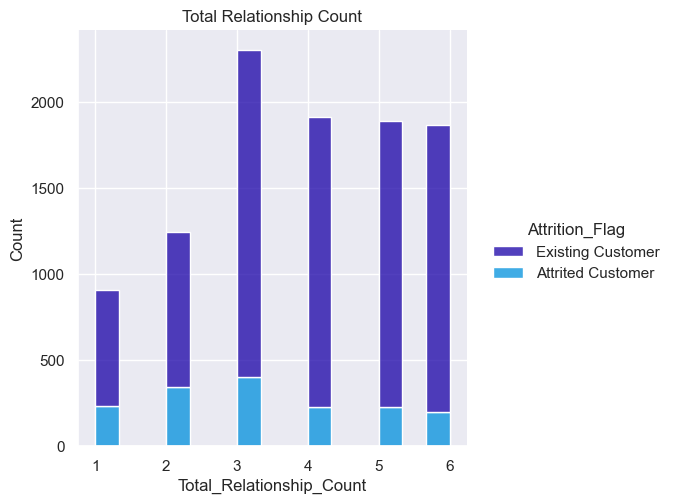

In [221]:
#Total_Relationship_Count
sns.displot( data=df,  x='Total_Relationship_Count',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Total Relationship Count')
plt.show()

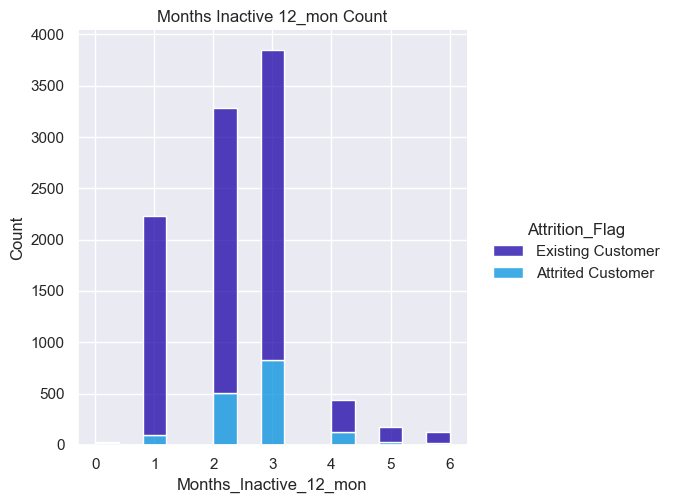

In [222]:
# Months_Inactive_12_mon
sns.displot( data=df,  x='Months_Inactive_12_mon',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Months Inactive 12_mon Count')
plt.show()

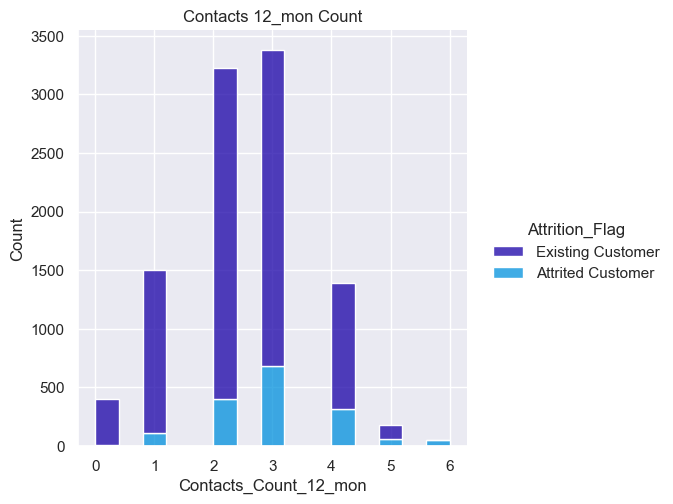

In [223]:
#Contacts_Count_12_mon
sns.displot( data=df,  x='Contacts_Count_12_mon',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Contacts 12_mon Count')
plt.show()

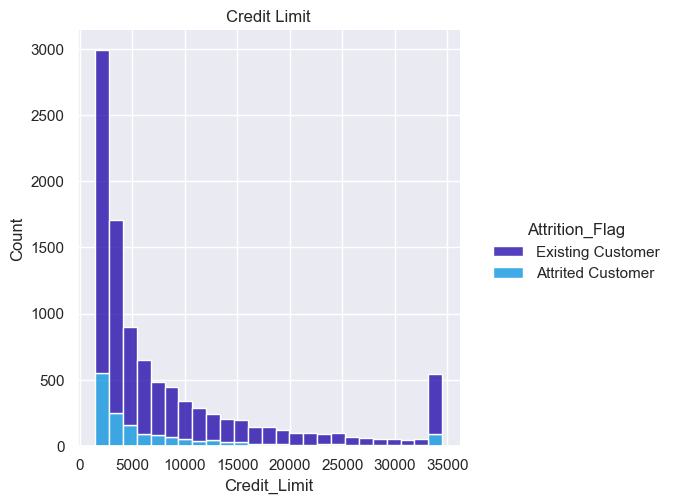

In [224]:
#Credit_Limit
sns.displot( data=df,  x='Credit_Limit',  hue='Attrition_Flag', bins=25, multiple='stack')
plt.title('Credit Limit')
plt.show()

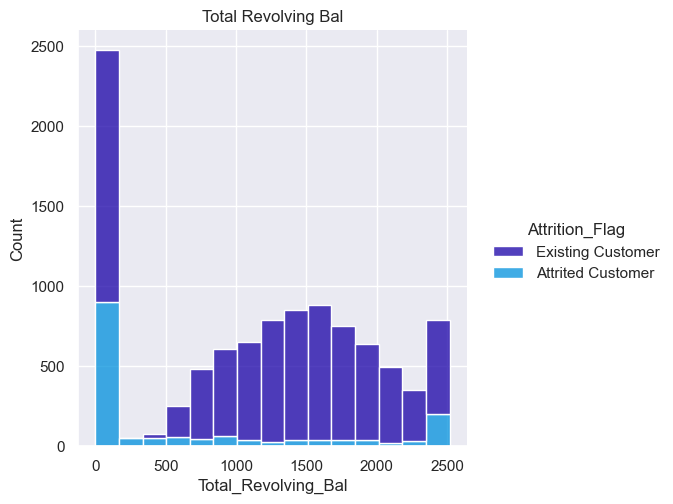

In [225]:
#Total_Revolving_Bal
sns.displot( data=df,  x='Total_Revolving_Bal',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Total Revolving Bal')
plt.show()

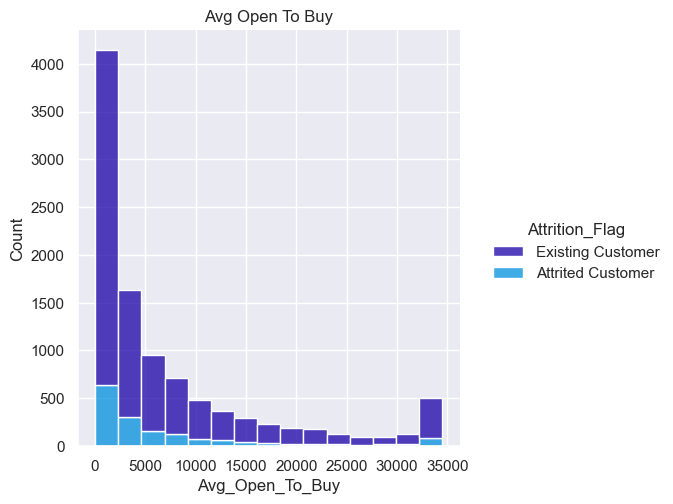

In [226]:
#Avg_Open_To_Buy
sns.displot( data=df,  x='Avg_Open_To_Buy',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Avg Open To Buy')
plt.show()

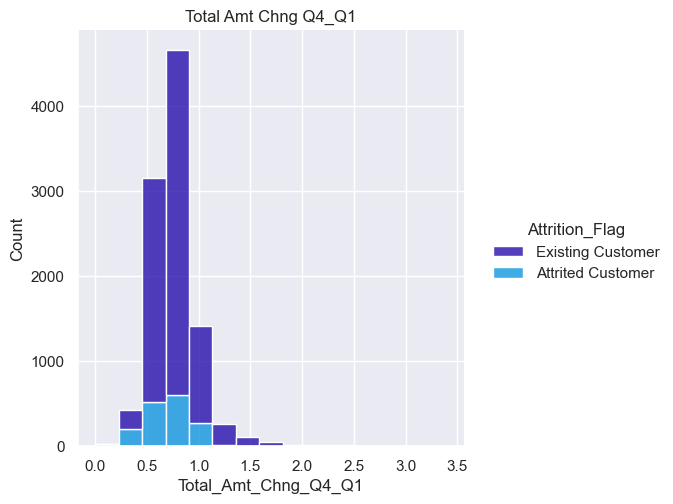

In [227]:
#Total_Amt_Chng_Q4_Q1
sns.displot( data=df,  x='Total_Amt_Chng_Q4_Q1',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Total Amt Chng Q4_Q1')
plt.show()

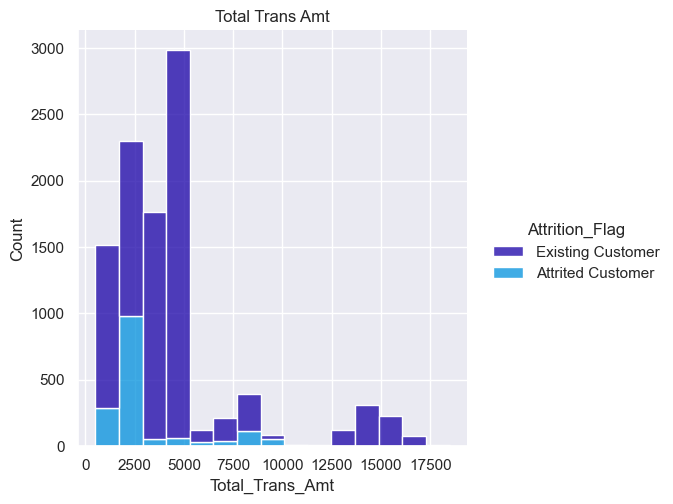

In [228]:
#Total_Trans_Amt
sns.displot( data=df,  x='Total_Trans_Amt',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Total Trans Amt')
plt.show()

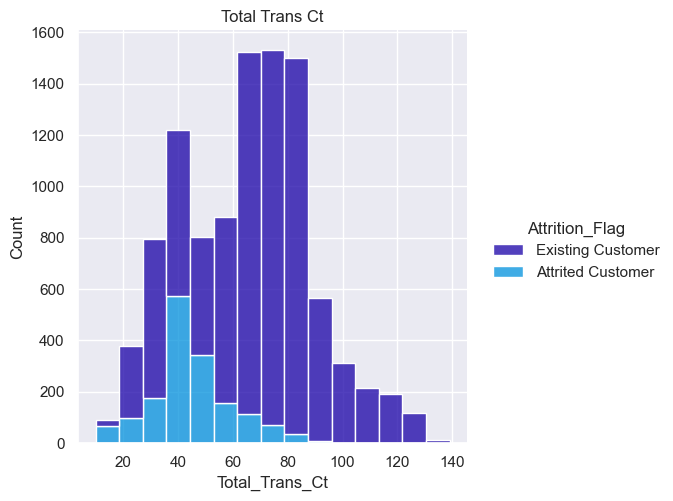

In [229]:
#Total_Trans_Ct
sns.displot( data=df,  x='Total_Trans_Ct',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Total Trans Ct')
plt.show()

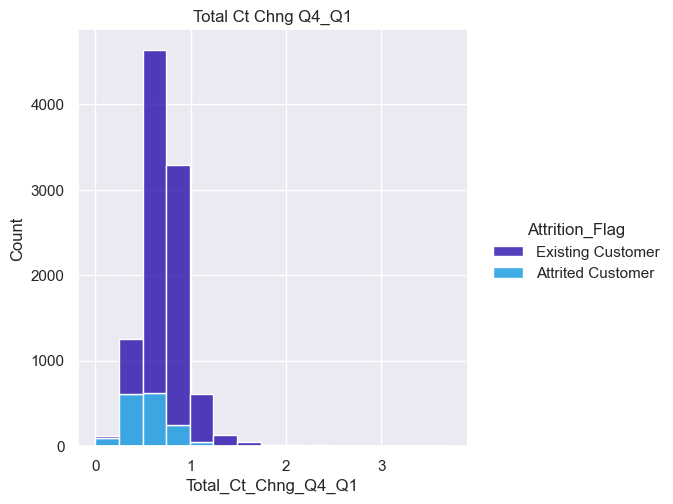

In [230]:
#Total_Ct_Chng_Q4_Q1
sns.displot( data=df,  x='Total_Ct_Chng_Q4_Q1',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Total Ct Chng Q4_Q1')
plt.show()

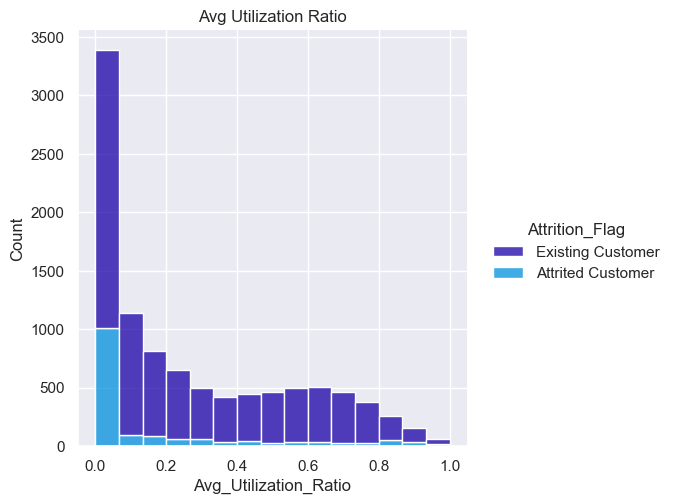

In [231]:
#Avg_Utilization_Ratio
sns.displot( data=df,  x='Avg_Utilization_Ratio',  hue='Attrition_Flag', bins=15, multiple='stack')
plt.title('Avg Utilization Ratio')
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
sns.set(palette="nipy_spectral")
sns.pairplot(data=df, hue="Attrition_Flag", corner=True)

# Data Preprocessing

### Outliers

In [ ]:
# Get all numerical columns
numerical_columns = df.select_dtypes(include=['number'])
# Melt the DataFrame to long format for box plotting
df_melted = df.melt(id_vars='Attrition_Flag', value_vars=numerical_columns.columns.tolist(), var_name='Num Variables', value_name='Count')

# Create a box plot for all numerical columns
plt.figure(figsize=(20, 10))
sns.boxplot(x='Num Variables', y='Count', hue='Attrition_Flag', data=df_melted)
plt.xticks(rotation=15)
# Customize the plot
plt.title('Box Plot of All Numerical Columns by Category', fontsize=16, fontweight='semibold')
plt.xlabel('Num Variables')
plt.ylabel('Count')

# Show the plot
plt.show()


### Correlation

In [ ]:
cm = numerical_columns.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True, cmap = 'viridis')

### Insights:

* Strong Positive Correlation between Total_Trans_Ct and Total_Trans_Amt:
The highest correlation in the chart is between Total_Trans_Ct and Total_Trans_Amt with a value of 0.81. This suggests that the more transactions a customer makes, the higher their total transaction amount is.

* Credit_Limit and Avg_Open_To_Buy:
There is a strong positive correlation (0.62) between Credit_Limit and Avg_Open_To_Buy, indicating that customers with higher credit limits also tend to have more available credit.

* Avg_Utilization_Ratio and Total_Revolving_Bal:
A moderate positive correlation (0.62) exists between Avg_Utilization_Ratio and Total_Revolving_Bal, suggesting that as the revolving balance increases, the credit utilization ratio also increases.

* Credit_Limit and Avg_Utilization_Ratio:
There is a moderate negative correlation (-0.48) between Credit_Limit and Avg_Utilization_Ratio, indicating that customers with higher credit limits tend to have a lower utilization ratio.

* Total_Trans_Amt and Avg_Open_To_Buy:
A weak positive correlation (0.17) exists between Total_Trans_Amt and Avg_Open_To_Buy, which suggests a slight relationship between how much a customer spends and how much available credit they have.

#### Null Values

In [ ]:
df.isnull().sum()

* Education_Level and Marital_Status are to be treated for missing values

In [ ]:
df['Education_Level'] = df["Education_Level"].fillna('Unknown')
df['Marital_Status'] = df["Marital_Status"].fillna('Unknown')

In [ ]:
df.isnull().sum()

* No more missing values

In [ ]:
#Check for unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("\n")


### Feature Engineering

In [ ]:
## Treating Income Category = abc
df.loc[df[df['Income_Category'] == 'abc'].index, 'Income_Category'] = 'Unknown'
df['Income_Category'].unique()

In [ ]:
df1 = df.copy()
df1.describe(include="all").T

In [ ]:

# For dropping columns
columns_to_drop = [
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age"
]


# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

In [ ]:
cat_columns = df1.select_dtypes(include="object").columns.tolist()
df1[cat_columns] = df1[cat_columns].astype("category")
df1.info()

#### Split Train, test

In [ ]:
X = df1.drop(columns=["Attrition_Flag"])
y = df1["Attrition_Flag"].map(target_mapper)

#Splitting into 80-20
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

#### Fit the Dataset

In [ ]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

In [ ]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

In [ ]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

X_train = column_dropper.fit_transform(X_train)
X_val = column_dropper.transform(X_val)
X_test = column_dropper.transform(X_test)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

X_train = value_masker.fit_transform(X_train)
X_val = value_masker.transform(X_val)
X_test = value_masker.transform(X_test)

# To impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)
X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
)
X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

## Model Building - Original Data

### Metrics for evaluation

In [ ]:
def get_metrics_score(model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True):

    # defining an empty list to store train and test results

    score_list = []
    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]

    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Score on training set : ",
                roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba)
            )
    return score_list 


In [ ]:
# # defining empty lists to add train and test results

model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)

In [ ]:
## for confusion matrix
def make_confusion_matrix(model, test_X, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth

    """
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Attrited", "Actual - Existing"]],
        columns=[i for i in ["Predicted - Attrited", "Predicted - Existing"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(5, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")

In [ ]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

### Build 5 models
* Bagging
* Random Forest Classifier
* Gradient Boosting
* Decision Tree Classifier
* Adaptive Boosting

In [ ]:
models = []  # Empty list to store all the models
cv_results = []
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1, algorithm='SAMME')))
models.append(("Decisiontree", DecisionTreeClassifier(random_state=1)))

# For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)  # Setting number of splits equal to 10

    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
    cv_results.append(cv_result)
    model.fit(X_train, y_train)
    model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
    add_score_model(name, model_score, cv_result.mean())

print("Added all models!")

### Compare 5 models

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False).style.highlight_max(color="green", axis=0).highlight_min(color="orange", axis=0)

* Best model is Gradient Boosting and the next best are Bagging and RandomForest respectively

### Cross-validation Result

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Models Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_results)
ax.set_xticklabels(model_names)

plt.show()

## Model Building - Oversampled data

In [ ]:
print("Before OverSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Overampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy="minority", k_neighbors=10, random_state=1
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

## Train

In [ ]:
models_over = []

# Appending models into the list

models_over.append(("Bagging OverSampling", BaggingClassifier(random_state=1)))
models_over.append(("Random forest OverSampling", RandomForestClassifier(random_state=1)))
models_over.append(("GBM OverSampling", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost OverSampling", AdaBoostClassifier(random_state=1, algorithm='SAMME')))
models_over.append(("Decision Tree OverSampling", DecisionTreeClassifier(random_state=1)))

for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=10
    )  # Setting number of splits equal to 10

    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_over)

    model.fit(X_train_over, y_train_over)
    model_score_over = get_metrics_score(
        model, X_train_over, X_val, y_train_over, y_val
    )
    add_score_model(name, model_score_over, cv_result_over.mean())

print("Adding Oversampling models Completed!")

### Compare models

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="orange", axis=0)

* After oversampling, Gradient Boost Oversampling model, Adaboost Oversampled, RandomForest Oversampled Models follow compared to earlier models.

## Model Building - Undersampled data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))


### Build Models

In [ ]:
models_under = []

# Appending models into the list

models_under.append(("Bagging UnderSampling", BaggingClassifier(random_state=1)))
models_under.append(("Random forest UnderSampling", RandomForestClassifier(random_state=1)))
models_under.append(("GBM UnderSampling", GradientBoostingClassifier(random_state=1)))
models_under.append(("Adaboost UnderSampling", AdaBoostClassifier(random_state=1, algorithm='SAMME')))
models_under.append(("DecisionTree UnderSampling", DecisionTreeClassifier(random_state=1)))

for name, model in models_under:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )  # Setting number of splits equal to 10

    cv_result_under = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    cv_results.append(cv_result_under)

    model.fit(X_train_un, y_train_un)
    model_score_under = get_metrics_score(model, X_train_un, X_val, y_train_un, y_val)
    add_score_model(name, model_score_under, cv_result_under.mean())

print("Adding Undersampling models Completed!")

### Compare Undersampling Models

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="orange", axis=0)

* After Undersampling, Gradient Boosting undersampled, Randomforest undersampled, Bagging undersampled models perform better than all other models
* Best 3 models are as follows:
   * Gradient Boosting Undersampling
   * Random Forest Undersamling
   * Bagging Undersampling

## Model Performance Improvement using Hyperparameter Tuning

### Choice of 3 models that can be tuned
* Gradient Boosting OverSampling:
      Worth tuning to potentially enhance already strong performance metrics.
* Adaboost UnderSampling:
      Needs tuning to improve performance metrics where Accuracy is least of all other models.
* Random Forest UnderSampling:
      Needs tuning due to potential overfitting (perfect train and test accuracy).

These models are selected based on their performance metrics and potential for improvement through tuning. This helps to optimize performance while avoiding overfitting and improving generalization to new data.

#### Tuning - Gradient Boosting Oversampling

In [ ]:
# defining model - Gradient Boosting Oversampling
model = GradientBoostingClassifier(random_state=1)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}
# RandomizedSearchCV setup
gbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                               n_iter=5, scoring=scorer, cv=3, random_state=1, n_jobs=1)

# Fit the RandomizedSearchCV
gbm_tuned.fit(X_train_over, y_train_over)

# Output the best parameters and the best score
print("Best parameters found: ", gbm_tuned.best_params_)
print("Best CV recall score: ", gbm_tuned.best_score_)

In [ ]:
# Create a new GradientBoostingClassifier with the best parameters
best_gbm = GradientBoostingClassifier(**gbm_tuned.best_params_, random_state=1)
# Fit the model on training data
best_gbm.fit(X_train_over, y_train_over)

In [ ]:
gbm_tuned_model_score = get_metrics_score(best_gbm, X_train, X_val, y_train, y_val)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
gbm_down_cv = cross_val_score(estimator=best_gbm, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
add_score_model("Tuned GBM Over Sampling", gbm_tuned_model_score, gbm_down_cv.mean())
make_confusion_matrix(best_gbm, X_val, y_val)

#### Tuning - AdaBoost Undersampling

In [ ]:
# Define the base model (AdaBoostClassifier)
model = AdaBoostClassifier(random_state=1, algorithm='SAMME')

# Parameter grid for AdaBoost (smaller ranges for faster tuning)
param_grid = {
    'n_estimators': [50, 100, 500],  # Reduced number of estimators
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Focus on a few key values for learning rate
}

# Scoring metric (recall)
scorer = metrics.make_scorer(recall_score)

# RandomizedSearchCV setup (reduced n_iter and lower cv)
adaboost_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                    n_iter=10, scoring=scorer, cv=3, random_state=1, n_jobs=1)

# Fit the RandomizedSearchCV
adaboost_tuned.fit(X_train_un, y_train_un)

# Output the best parameters and the best score
print("Best parameters found: ", adaboost_tuned.best_params_)
print("Best CV recall score: ", adaboost_tuned.best_score_)


In [ ]:
# Create a new AdaBoostingClassifier with the best parameters
best_ada = AdaBoostClassifier(**adaboost_tuned.best_params_, random_state=1, algorithm='SAMME')
# Fit the model on training data
best_ada.fit(X_train_un, y_train_un)

In [ ]:
ada_tuned_model_score = get_metrics_score(best_ada, X_train, X_val, y_train, y_val)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = "recall"
ada_down_cv = cross_val_score(estimator=best_ada, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
add_score_model("Tuned AdaBoost Under Sampling", ada_tuned_model_score, ada_down_cv.mean())
make_confusion_matrix(best_ada, X_val, y_val)

#### Tuning - Random Forest UnderSampling

In [ ]:
# Define the model
model = RandomForestClassifier(random_state=1)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Limit the range for speed
    'max_depth': [10, 20, 30, None],  # Include None for unlimited depth
    'min_samples_split': [2, 5, 10],  # Focus on reasonable values
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt'],  # Common options
    'bootstrap': [True, False]  # Bootstrap sampling (whether or not to sample with replacement)
}

# Scoring metric (recall)
scorer = metrics.make_scorer(recall_score)

# RandomizedSearchCV setup (reduced n_iter and lower cv)
rf_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                              n_iter=10, scoring=scorer, cv=3, random_state=1, n_jobs=1)

# Fit the RandomizedSearchCV
rf_tuned.fit(X_train_un, y_train_un)

# Output the best parameters and the best score
print("Best parameters found: ", rf_tuned.best_params_)
print("Best CV recall score: ", rf_tuned.best_score_)


In [ ]:
# Create a new RandomForestClassifier with the best parameters
best_rf = RandomForestClassifier(**rf_tuned.best_params_, random_state=1)
# Fit the model on training data
best_rf.fit(X_train_un, y_train_un)

In [ ]:
rf_tuned_model_score = get_metrics_score(best_rf, X_train, X_val, y_train, y_val)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = "recall"
rf_cv = cross_val_score(estimator=best_rf, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
add_score_model("Tuned RandomForest Under Sampling", rf_tuned_model_score, rf_cv.mean())
make_confusion_matrix(best_rf, X_val, y_val)

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)
# model_names
# comparison_frame
# for col in comparison_frame.select_dtypes(include="float64").columns.tolist():
#     comparison_frame[col] = comparison_frame[col] * 100, 0).astype(int)


comparison_frame.tail(3).sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
)

#### Performance of tuned models:
##### Tuned GBM Over Sampling:
* High Training and Test Scores: The model achieves perfect accuracy and recall on the training data and very high accuracy and recall on the test data, indicating strong performance on both datasets.
* Precision Trade-Off: The precision is lower on the training set compared to the test set, which could indicate that the model is more conservative on the training set, potentially overfitting to the training data.
* ROC AUC: The ROC AUC scores are excellent, showing that the model has a high ability to distinguish between the classes.

##### Tuned RandomForest Under Sampling:
* High Recall on Training Set: The model achieves perfect recall on the training set but has slightly lower recall on the test set. This suggests the model is very good at identifying positive cases during training but slightly less effective on unseen data.
* Precision and F1 Scores: The precision and F1 scores are lower compared to the GBM model, indicating a trade-off between precision and recall.
* ROC AUC: Very high ROC AUC scores on both training and test data, indicating the model's strong discriminative power.

##### Tuned AdaBoost Under Sampling
* Balanced Performance: The AdaBoost model shows relatively consistent performance across training and test datasets, with close accuracy, recall, precision, and F1 scores.
* High ROC AUC: The ROC AUC scores are also high, demonstrating strong performance in distinguishing between classes.
* Moderate Precision and Recall: The model has a good balance of precision and recall, which might be preferred depending on the application’s requirements.


## Model Performance Comparison and Final Model Selection

* Of all, Gradient boosting of oversampling data is having the highest accuracy.

In [ ]:
#Lets check the test data
feature_names = X_train.columns
importances =best_gbm.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
gbm_tuned_model_test_score = get_metrics_score(
    best_gbm, X_train, X_test, y_train, y_test
)

final_model_names = ["gbm Tuned Down-sampled Trained"]
final_acc_train = [gbm_tuned_model_test_score[0]]
final_acc_test = [gbm_tuned_model_test_score[1]]
final_recall_train = [gbm_tuned_model_test_score[2]]
final_recall_test = [gbm_tuned_model_test_score[3]]
final_precision_train = [gbm_tuned_model_test_score[4]]
final_precision_test = [gbm_tuned_model_test_score[5]]
final_f1_train = [gbm_tuned_model_test_score[6]]
final_f1_test = [gbm_tuned_model_test_score[7]]
final_roc_auc_train = [gbm_tuned_model_test_score[8]]
final_roc_auc_test = [gbm_tuned_model_test_score[9]]

final_result_score = pd.DataFrame(
    {
        "Model": final_model_names,
        "Train_Accuracy": final_acc_train,
        "Test_Accuracy": final_acc_test,
        "Train_Recall": final_recall_train,
        "Test_Recall": final_recall_test,
        "Train_Precision": final_precision_train,
        "Test_Precision": final_precision_test,
        "Train_F1": final_f1_train,
        "Test_F1": final_f1_test,
        "Train_ROC_AUC": final_roc_auc_train,
        "Test_ROC_AUC": final_roc_auc_test,
    }
)


for col in final_result_score.select_dtypes(include="float64").columns.tolist():
    final_result_score[col] = final_result_score[col] * 100


final_result_score

* Performance is very good on the test data

In [ ]:
make_confusion_matrix(best_gbm, X_test, y_test)

In [ ]:
y_pred_prob = best_gbm.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

* AUC is 0.99, which indicates that the GBM Oversampling Tuned model has excellent performance. A value close to 1 means the model is almost perfect at distinguishing between positive and negative classes.

## Actionable Insights and Recommendations

##### Top Features:
* total_trans_amt (Total Transaction Amount) and total_trans_ct (Total Transaction Count):
Customers who spend and transact more frequently are likely important for business outcomes (e.g., loyal customers or high-value customers).
Recommendation: Focus on these customers with rewards programs, personalized offers, or loyalty initiatives to retain and engage them further.

* total_revolving_bal (Total Revolving Balance):
Customers with a higher revolving balance could indicate frequent credit usage or a reliance on credit.
Recommendation: Provide these customers with financial advice, credit management tools, or promotional interest rate offers to reduce their balance.

* total_ct_chng_q4_q1 (Change in Transaction Count from Q4 to Q1) and total_relationship_count:
A large change in transaction counts between quarters might indicate seasonal behavior or changes in customer needs.
Customers with multiple product relationships (savings, loans, etc.) are likely to be more engaged.
Recommendation: Tailor marketing efforts based on seasonal trends, and offer cross-product promotions to further deepen customer relationships.

* avg_utilization_ratio (Average Utilization Ratio):
High utilization ratios may signal riskier financial behavior or higher credit dependency.
Recommendation: Offer these customers debt counseling or credit limit adjustments to improve their financial health.

* months_inactive_12_mon (Months Inactive in Last 12 Months):
Customers who have been inactive for several months are at risk of churn.
Recommendation: Re-engage these customers with targeted offers, reminders, or personalized services to bring them back into active usage.

* contacts_count_12_mon (Number of Contacts in the Last 12 Months):
More contact with the customer (e.g., customer service interactions) may indicate either dissatisfaction or a strong relationship.
Recommendation: Analyze the nature of these interactions to identify potential pain points or opportunities for enhancing customer support.

##### Lower Importance Features:
* Income Category, Education Level, Marital Status:
These demographic features have much lower importance compared to transaction and account-specific metrics.
Actionable Insights: While demographics are useful for segmentation, focus more on behavioral and account-specific features for predictive purposes.


By focusing on transaction activity, account balances, and relationship depth, the business can target specific customer groups for retention, growth, and engagement.
* Churn Prevention: Focus retention efforts on customers who show declining transaction activity or months of inactivity. Proactive engagement could help prevent churn.